## Introduction

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 


In [ ]:
### Loading necessary libraries

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.layers import BatchNormalization

## Loading The Dataset


MNIST dataset has 60000 images for training set and 10000 images for test set. All images are gray scale with size of 28*28 pixels.

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


### Reshaping data : 
Each image have size of 28*28 pixels; that is 28 pixels height and 28 pixels width and hence (28, 28, 1), 1 in last part is to specify color depth of the pixel. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)

Shape of X_train:  (60000, 28, 28, 1)
Shape of X_test:  (10000, 28, 28, 1)


### Normalization :
Pixel values of each image in the dataset are unsigned integers in range between 0 to 255. We can normalize these pixel values to have range between 0 to 1. It improves the performance of model.

In [ ]:
x_train[20000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Plotting Some Images using matplotlib

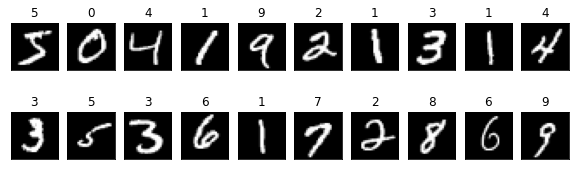

In [ ]:
fig = plt.figure(figsize=(10,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

### Building the Model

We will use a Sequential model.

The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

-> Conv2D is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:

1. filters - the number of filters (Kernels) used with this layer; 
2. kernel_size - the dimmension of the Kernel: (3 x 3);
3. activation - is the activation function used, in this case relu;
4. kernel_initializer - the function used for initializing the kernel;
5. input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28 The input and output of the Conv2D is a 4D tensor.
6. Stride
7. Zero Padding

-> Batch Normalization : Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.

-> MaxPooling2D is a Max pooling operation for spatial data. Parameters used here are:
1. pool_size, in this case (2,2), representing the factors by which to downscale in both directions;

-> Dropout : Dropouts are the regularization technique that is used to prevent overfitting in the model. Dropouts are added to randomly switching some percentage of neurons of the network

-> Flatten. The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.;

-> Dense1 . This layer is a regular fully-connected NN layer. It is used without parameters;
units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
activation - activation function : relu;

->Dense2. This is the final layer (fully connected). It is used with the parameters:
units: the number of classes (in our case 10);
activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)

In [ ]:
# defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), activation='relu', kernel_initializer='he_normal' ,input_shape= x_train.shape[1:] , strides = 1 , padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), activation='relu',strides = 1 ,padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (5,35), activation='relu',strides = 1 ,padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)         

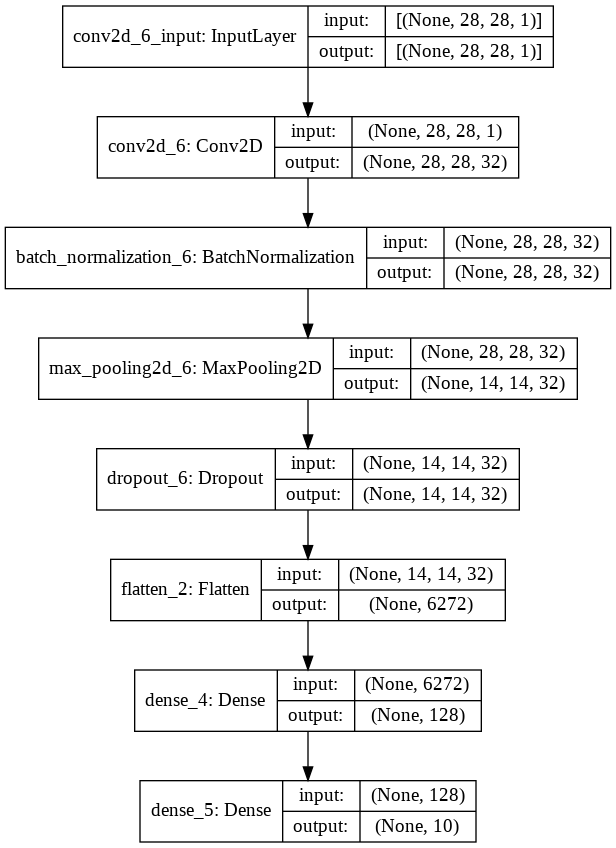

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

### Training :
Now that we have better understanding of the model, let’s train our model on train dataset and validate it on validation data set. The fit() function has validation_split parameter to control the amount of validation data. Verbose can have value of 0 and 2. If it is set to 0 then we can not see the performance of model during training process.

In [ ]:
# define loss and optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01 , beta_1 = 0.9 , beta_2 = 0.999 , epsilon = 1e-08)
model.compile(optimizer= opt , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=30, batch_size=128, verbose=2, validation_split=0.2)

Epoch 1/30
375/375 - 26s - loss: 0.4140 - accuracy: 0.8867 - val_loss: 0.2326 - val_accuracy: 0.9357
Epoch 2/30
375/375 - 25s - loss: 0.0903 - accuracy: 0.9739 - val_loss: 0.0536 - val_accuracy: 0.9855
Epoch 3/30
375/375 - 25s - loss: 0.0651 - accuracy: 0.9808 - val_loss: 0.0485 - val_accuracy: 0.9868
Epoch 4/30
375/375 - 25s - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.0809 - val_accuracy: 0.9803
Epoch 5/30
375/375 - 26s - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 6/30
375/375 - 25s - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0333 - val_accuracy: 0.9912
Epoch 7/30
375/375 - 25s - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0360 - val_accuracy: 0.9909
Epoch 8/30
375/375 - 25s - loss: 0.0398 - accuracy: 0.9885 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 9/30
375/375 - 25s - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 10/30
375/375 - 25s - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0492 - val_accura

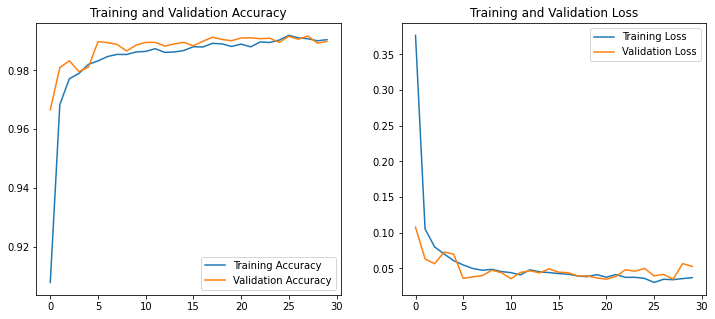

In [ ]:

### ploting the learning curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100}')
print(f'Test Loss : {loss}')

Test Accuracy: 99.19000267982483
Test Loss : 0.042176637798547745


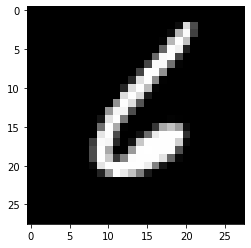

In [ ]:
image = x_train[1515]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [ ]:
image.shape

(28, 28, 1)

In [ ]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)))

Predicted: 6


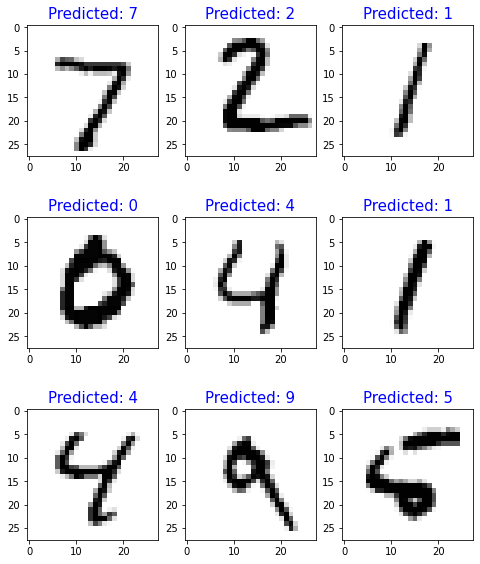

In [ ]:
fig , axis = plt.subplots(3,3,figsize=(8,10))

for i,ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(28,28),cmap='binary')
    pred=model.predict(x_test[i].reshape(1,28,28,1)).argmax()
    ax.set_title('Predicted: {}'.format(pred),fontsize=15,color='blue')